In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.geodesic import Geodesic
land_color = [85/255, 92/255, 105/255]
land_feature=cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=land_color)
plt.rcParams['axes.grid'] = True
import numpy as np
import xarray as xr
import pandas as pd
import gsw, os 
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from math import radians
from sklearn.metrics.pairwise import haversine_distances
etopo = xr.open_dataset('/home1/datawork/kbalem/ETOPO1_Bed_g_gmt4.nc')

In [2]:
clim_glorys = xr.open_mfdataset('/export/home1/DATA/GLORYS-CLIMATOLOGY/*.nc')
clim_glorys

<xarray.Dataset>
Dimensions:    (time: 12, longitude: 4320, latitude: 2041, depth: 50)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 1993-12-16T12:00:00
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * latitude   (latitude) float32 -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
Data variables:
    mlotst     (time, latitude, longitude) float32 dask.array<chunksize=(1, 15, 4320), meta=np.ndarray>
    zos        (time, latitude, longitude) float32 dask.array<chunksize=(1, 15, 4320), meta=np.ndarray>
    bottomT    (time, latitude, longitude) float32 dask.array<chunksize=(1, 15, 4320), meta=np.ndarray>
    sithick    (time, latitude, longitude) float32 dask.array<chunksize=(1, 15, 4320), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(1, 15, 4320), meta=np.ndarray>
    usi        (time, latitude, longitude) float32 dask.array<chunksize=(1, 15, 4320), meta=np.ndarray>
    vsi        (time, latitude, longitude) float32 dask.array<chunksize=(1, 15, 4320), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 4320), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 4320), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 4320), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 1, 15, 4320), meta=np.ndarray>
Attributes: (12/16)
    CDI:                           Climate Data Interface version 1.9.3 (http...
    source:                        MERCATOR GLORYS12V1
    institution:                   Mercator Ocean
    Conventions:                   CF-1.6
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    ...                            ...
    product:                       GLOBAL_REANALYSIS_001_030
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    CDO:                           Climate Data Operators version 1.9.3 (http...
    title:                         Monthly climatology fields for product GLO...
    dataset:                       global-reanalysis-phy-001-030-monthly-clim...

In [4]:
df = xr.open_dataset('DeepArvorGroundings_all_tids.nc')
df = df.where(df['MIN_DIST_TO_MB']>10,drop=True).dropna('N_GRD')
df

<xarray.Dataset>
Dimensions:          (N_GRD: 1868)
Dimensions without coordinates: N_GRD
Data variables: (12/15)
    LATITUDE         (N_GRD) float64 47.33 47.29 47.36 ... 53.65 50.77 72.16
    LONGITUDE        (N_GRD) float64 -8.415 -8.444 -8.452 ... -31.44 -0.4657
    PROFILER_TYPE    (N_GRD) float64 838.0 838.0 838.0 ... 838.0 838.0 838.0
    CYCLE_NUMBER     (N_GRD) float64 81.0 83.0 85.0 86.0 ... 17.0 121.0 123.0
    WMO              (N_GRD) float64 6.902e+06 6.902e+06 ... 6.903e+06 6.904e+06
    GROUNDING_DATE   (N_GRD) datetime64[ns] 2014-07-21T15:52:00 ... 2023-12-0...
    ...               ...
    TID              (N_GRD) float64 17.0 17.0 17.0 17.0 ... 40.0 40.0 40.0 17.0
    GEBCO_DEPTH      (N_GRD) float64 -2.679e+03 -3.183e+03 ... -2.255e+03
    LATITUDE_C0      (N_GRD) float64 47.33 47.27 47.35 ... 53.6 50.72 72.17
    LATITUDE_C1      (N_GRD) float64 47.34 47.29 47.37 ... 53.62 50.76 72.16
    LONGITUDE_C0     (N_GRD) float64 -8.411 -8.465 -8.462 ... -31.41 -0.431
    LONGITUDE_C1     (N_GRD) float64 -8.418 -8.446 -8.458 ... -31.47 -0.4698
Attributes:
    title:              Grounding data from Deep Arvor floats
    author:             Kevin Balem
    author_affilation:  IFREMER-LOPS
    author_contact:     kevin.balem@ifremer.fr
    date:               2024-01-15T08:35:25
    Processing 1:       Only grounding occuring during descent to profile are...
    Processing 2:       Corrected positions are calculated from the first GPS...

In [63]:
np.sqrt(vel.uo.mean()**2+vel.vo.mean()**2).load()

<xarray.DataArray ()>
array(0.05676428, dtype=float32)
Coordinates:
    time     datetime64[ns] 1993-11-16

In [96]:
vel

<xarray.Dataset>
Dimensions:    (latitude: 2, longitude: 3)
Coordinates:
    time       datetime64[ns] 1993-06-16
  * longitude  (longitude) float32 -53.83 -53.75 -53.67
  * latitude   (latitude) float32 59.58 59.67
Data variables:
    uo         (latitude, longitude) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>
    vo         (latitude, longitude) float32 dask.array<chunksize=(2, 3), meta=np.ndarray>

Text(0.5, 1.0, 'distance check : 2.5 km')

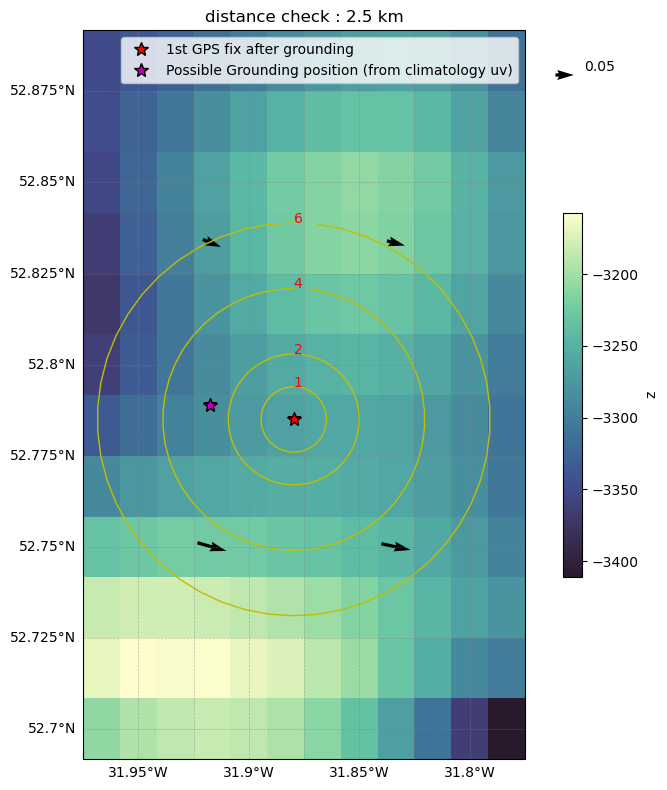

In [105]:
i = 1000
du = df.isel(N_GRD=i)

bathy = etopo
#bathy = gebco
bdim={'x':'x','y':'y','z':'z'}
#bdim={'x':'lon','y':'lat','z':'elevation'}
rsize=.1

fig=plt.figure(figsize=(8,8),tight_layout=True)
ax = fig.add_subplot(1,1,1, projection=ccrs.Mercator())
ax.add_feature(land_feature, edgecolor=None)

bbox = [du['LONGITUDE'].values-rsize, du['LONGITUDE'].values+rsize, du['LATITUDE'].values-rsize, du['LATITUDE'].values+rsize]

bathy.where((bathy[bdim['x']]>bbox[0])&(bathy[bdim['x']]<bbox[1])&(bathy[bdim['y']]>bbox[2])&(bathy[bdim['y']]<bbox[3]),
            drop=True)[bdim['z']].plot(cmap=cmocean.cm.deep_r, cbar_kwargs={'shrink': 0.5},ax=ax, transform=ccrs.PlateCarree())

ax.plot(du['LONGITUDE'],du['LATITUDE'],'*r', markersize=10, markeredgecolor='k', alpha=1, transform=ccrs.PlateCarree(),zorder=10,label='1st GPS fix after grounding')
#ax.plot(du['LONGITUDE_C0'],du['LATITUDE_C0'],'*c', markersize=10, markeredgecolor='k', alpha=1, transform=ccrs.PlateCarree(),zorder=11,label='Possible Grounding position (from daily uv)')
ax.plot(du['LONGITUDE_C1'],du['LATITUDE_C1'],'*m', markersize=10, markeredgecolor='k', alpha=1, transform=ccrs.PlateCarree(),zorder=11,label='Possible Grounding position (from climatology uv)')
plt.legend()

rads = [1,2,4,6]
for r in rads:
    PTS=np.array(Geodesic().circle(lon=du['LONGITUDE'].values,lat=du['LATITUDE'].values,radius=r*1000,n_samples=50))
    ax.plot(PTS[:,0],PTS[:,1],'y-',linewidth=1, transform=ccrs.PlateCarree())
    ax.text(PTS[0,0],PTS[0,1],str(r),color='r',transform=ccrs.PlateCarree())

vel = clim_glorys[['uo','vo']].sel(longitude=slice(bbox[0],bbox[1]),latitude=slice(bbox[2],bbox[3]))
vel = vel.sel(time=np.datetime64('1993-'+str(pd.to_datetime(du.GROUNDING_DATE.values).month).zfill(2)+'-16'),method='nearest')
vel = vel.where(vel['depth']<du.GROUNDING_DEPTH.values,drop=True).mean('depth')
vel.plot.quiver(x='longitude',y='latitude',u='uo',v='vo',ax=ax,transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.set_title('distance check : '+
    str(np.round(((int((du.PROFILE_DATE - du.GROUNDING_DATE).values)/(1e9))*np.sqrt(vel.uo.mean()**2+vel.vo.mean()**2).load().values)/1000.,1))+' km')